In [127]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [129]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


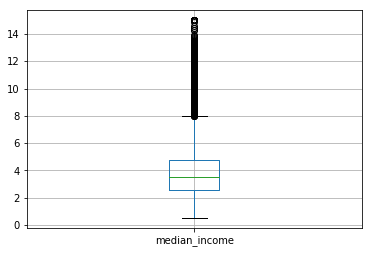

In [130]:
bp = data.boxplot(column='median_income')


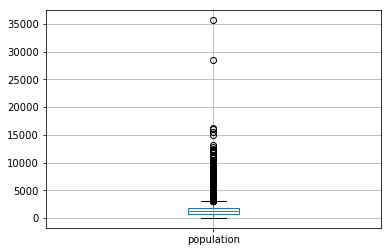

In [131]:
bp = data.boxplot(column='population')


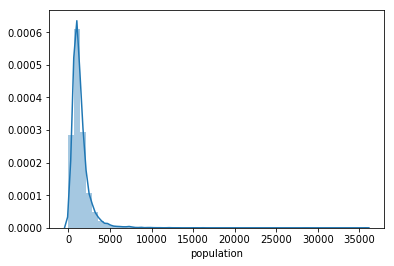

In [132]:
import seaborn as sns
sns.distplot(data['population'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c87b8f160>]],
      dtype=object)

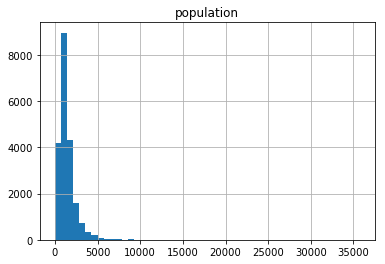

In [133]:
data.hist(column='population', bins=50)

In [134]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.hist(data['median_income'], bins = 50, range = (data['median_income'].min(),data['median_income'].max()))
# plt.title('Population')
# plt.xlabel('population')
# plt.ylabel('Count of population')
# plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c87ad5da0>]],
      dtype=object)

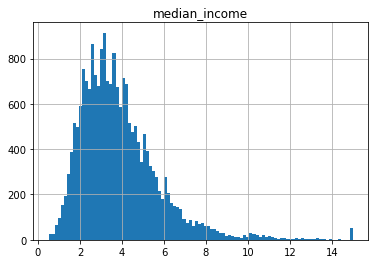

In [135]:
data.hist(column='median_income', bins=100)

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stand_df = pd.DataFrame(scaler.fit_transform(data[['median_income','population']].values), columns=['median_income','population'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c889d7588>]],
      dtype=object)

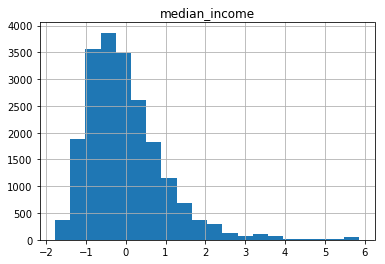

In [137]:
stand_df.hist(column='median_income', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c890d11d0>]],
      dtype=object)

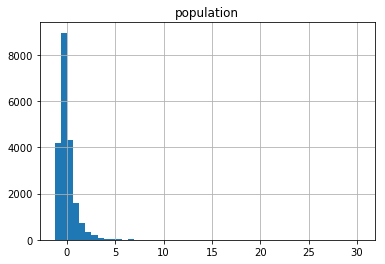

In [143]:
stand_df.hist(column='population', bins=50)

In [139]:
from sklearn.preprocessing import MinMaxScaler
minScaler = MinMaxScaler()
minmax_df = pd.DataFrame(minScaler.fit_transform(data[['median_income','population']].values), columns=['median_income','population'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c88a5a4a8>]],
      dtype=object)

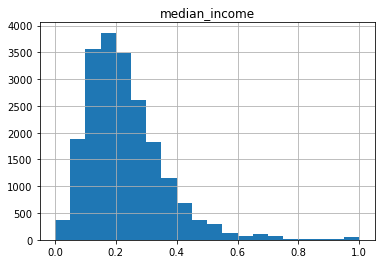

In [140]:
minmax_df.hist(column='median_income', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c88fc1668>]],
      dtype=object)

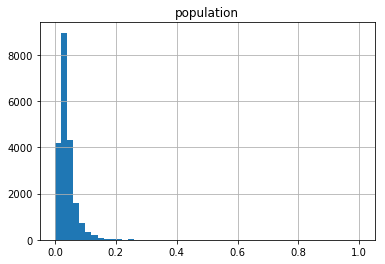

In [142]:
minmax_df.hist(column='population', bins=50)

In [108]:
df = pd.read_csv("employee.csv",index_col="ID")
df

,Age,Salary
ID,,
A,30,100000
B,25,70000
C,31,110000
D,45,205000
E,50,101000


In [109]:
import numpy as np
df['distance'] = df[['Age', 'Salary']].sub(df.loc['A']).pow(2).sum(1).pow(0.5)
df

,Age,Salary,distance
ID,,,
A,30,100000,0.000000
B,25,70000,30000.000417
C,31,110000,10000.000050
D,45,205000,105000.001071
E,50,101000,1000.199980


In [103]:
df['Age_scale']=0
df['Salary_scale']=0

In [105]:
df[['Age_scale','Salary_scale']] = minScaler.fit_transform(df[['Age','Salary']])#pd.Da#aFrame(minScaler.fit_transform(df[['Age','Salary']].values), columns=['Age','Salary'])
df['new_distance'] = df[['Age_scale', 'Salary_scale']].sub(df.iloc[0]).pow(2).sum(1).pow(0.5)
df

,Age,Salary,distance,Age_scale,Salary_scale,new_distance
ID,,,,,,
A,30,100000,0.000000,0.20,0.222222,0.000000
B,25,70000,30000.000417,0.00,0.000000,0.298969
C,31,110000,10000.000050,0.24,0.296296,0.084184
D,45,205000,105000.001071,0.80,1.000000,0.982313
E,50,101000,1000.199980,1.00,0.229630,0.800034
